In [14]:
import sklearn
from sklearn.model_selection import GridSearchCV
import numpy as np
import pickle
import os

Load and Split the Data

In [15]:
def unPickleData(filename):
  with open(filename,'rb') as f: arr = pickle.load(f)
  return arr

def getDataPath(dirname,filename):
  return os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)),"processed_data", dirname,filename)

x_data = unPickleData(getDataPath("posts","X_posts.pkl"))
y_data = unPickleData(getDataPath("posts","Y_posts.pkl"))

In [16]:
X, y = [], []
Class0_max_count = 30000
for i in range(len(x_data)):
    if y_data[i] == 0: 
        if Class0_max_count > 0:
            X.append(x_data[i])
            y.append(y_data[i])
            Class0_max_count -= 1 
    else:
        X.append(x_data[i])
        y.append(y_data[i])

np_y = np.array(y)
print("class 0:", len(np_y[np_y==0]))
print("class 1:", len(np_y[np_y==1]))

class 0: 30000
class 1: 9114


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6 , random_state= 42)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5 , random_state= 42)

In [18]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [19]:
y_pred = classifier.predict(X_test)

print(sklearn.metrics.classification_report(y_test,y_pred))
print(f"Accuracy = {sklearn.metrics.accuracy_score(y_test, y_pred)}")
print(f"f-measure = {sklearn.metrics.f1_score(y_test, y_pred, average='macro')}")

              precision    recall  f1-score   support

           0       0.89      0.54      0.67      6019
           1       0.34      0.78      0.47      1804

    accuracy                           0.59      7823
   macro avg       0.61      0.66      0.57      7823
weighted avg       0.76      0.59      0.63      7823

Accuracy = 0.594528953087051
f-measure = 0.5705926775007649


Saving the model

In [20]:
def getSavedModelPath(dirname,filename):
  return os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)),"savedModels", dirname,filename)

with open(getSavedModelPath("posts","NaiveBayes.pkl"), 'wb') as f:
    pickle.dump(classifier,f)

Confusion Matrix

Confusion matrix, without normalization
[[3249 2770]
 [ 402 1402]]
Normalized confusion matrix
[[0.53979066 0.46020934]
 [0.22283814 0.77716186]]


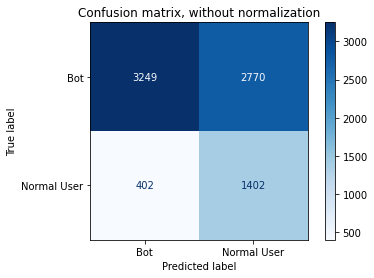

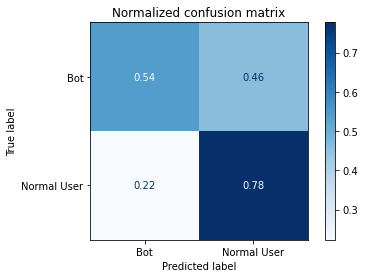

In [21]:
import matplotlib.pyplot as plot
from sklearn.metrics import ConfusionMatrixDisplay

title_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in title_options:
    display = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=["Bot" , "Normal User"],
        cmap=plot.cm.Blues,
        normalize=normalize,
    )
    display.ax_.set_title(title)

    print(title)
    print(display.confusion_matrix)

plot.show()


Learning Curve

In [22]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_size, train_score, test_scores = learning_curve(classifier, X_train, y_train, cv = 10, scoring='accuracy', n_jobs=1, train_sizes=np.linspace(0.01, 1, 50), verbose=1)
mean_train = np.mean(train_score , axis = 1)
mean_test = np.mean(test_scores , axis = 1)
plt.plot(train_size, 1-mean_train, label='Training score')
plt.plot(train_size, 1-mean_test, label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

[learning_curve] Training set sizes: [  211   637  1064  1491  1918  2344  2771  3198  3625  4051  4478  4905
  5331  5758  6185  6612  7038  7465  7892  8319  8745  9172  9599 10026
 10452 10879 11306 11732 12159 12586 13013 13439 13866 14293 14720 15146
 15573 16000 16426 16853 17280 17707 18133 18560 18987 19414 19840 20267
 20694 21121]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
